<a href="https://colab.research.google.com/github/mapzine123/machine-running/blob/main/%EB%B6%84%EB%A5%98%ED%95%98%EB%8A%94_%EB%89%B4%EB%9F%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 퍼셉트론 알고리즘
이진 분류 문제에서 최적의 가중치를 학습하는 알고리즘  
`이진 분류` : 임의의 샘플 데이터를 True나 False로 구분하는 문제

`선형함수` : `w1x1 + w2x2 + b = z`

```
# 계단 함수
if(z > 0) {
  y = 1 # 양성 클래스
} else {
  y = -1 # 음성 클래스
}
```

# 정리
선형 함수를 통과한 값 z를 계단 함수로 보내 0보다 큰지, 작은지 검사해 1과 -1로 분류하는 알고리즘

# 아달린 (적응형 선형 뉴런)
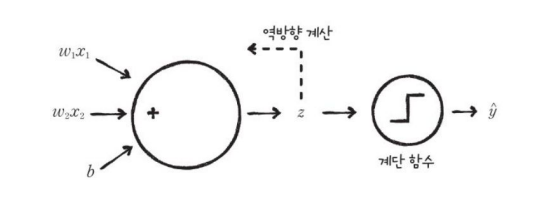

역방향 계산이 계단 함수 출력 이후에 일어나지 않고, 선형 함수 출력 이후에 진행되는게 특징

# 로지스틱 회귀

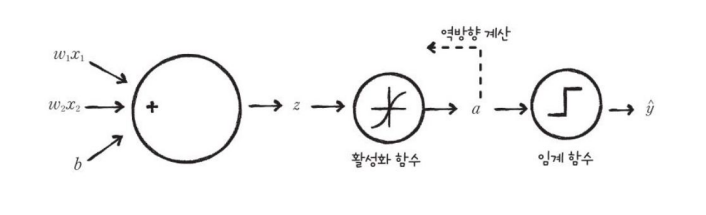

선형 함수를 통과시켜 얻은 z를 임계 함수에 보내기 전에 `활성화 함수(activation aunction)`으로 변형시킴
a = 활성화 함수를 통과한 값

`임계함수`는 아달린과 퍼셉트론의 계단 함수와 비슷한 역할을 하지만, 활성화 함수의 출력값을 사용한다는 점이 다름

## 활성화 함수는 비선형 함수를 사용함
`선형 함수` : 그래프를 그렸을때 직선의 형태를 갖는 함수 (함수값 예측이 쉬움)
`비선형 함수` : 그래프를 그렸을 때 직선의 형태를 갖지 않는 함수 (함수값 예측이 어려움)

# 시그모이드 함수
선형 함수 출력값 z를 0~1 사이의 확률값으로 변환해주는 함수

# 정리
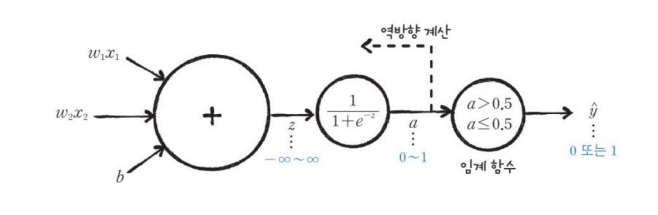

로지스틱 회귀는 이진 분류가 목표이므로 -∞ ~ ∞ 의 범위를 가지는 z의 값을 조절할 방법이 필요해 시그모이드 함수를 활성화 함수로 사용  
시그모이드 함수를 사용하면 z를 확률처럼 해석할 수 있기 때문  
그렇게 온 시그모이드 함수의 확률인 a를 0과 1로 구분하기 위해 임계 함수 사용  
결과 입력 데이터 x는 0 or 1의 값으로 나누어짐